In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat

%matplotlib inline

In [2]:
## 0 --- 1 = 0 pos
## 1 -- -1 = 1 neg

train = pd.read_csv('./datasets_assignement1/P1b_training_data.txt',skiprows=0, header=None)
    
print(len(train))

400


In [3]:
X_train = train.values[:,0]
y_train = train.values[:,1]

print(X_train.shape, y_train.shape)

X_train_0 = X_train[:200]
y_train_0 = y_train[:200]

X_train_1 = X_train[200:]
y_train_1 = y_train[200:]

print(X_train_0.shape, X_train_1.shape)

(400,) (400,)
(200,) (200,)


In [4]:
mu0 = np.average(X_train_0)
var0 = np.var(X_train_0)
sig0 = np.sqrt(var0)

mu1 = np.average(X_train_1)
var1 = np.var(X_train_1)
sig1 = np.sqrt(var1)

print(mu0, sig0)
print(mu1, sig1)

-0.062505 1.01272485897
-0.119335 1.89888590831


(array([  1.,   3.,  13.,  17.,  36.,  39.,  38.,  27.,  19.,   7.]),
 array([-5.931 , -4.9208, -3.9106, -2.9004, -1.8902, -0.88  ,  0.1302,
         1.1404,  2.1506,  3.1608,  4.171 ]),
 <a list of 10 Patch objects>)

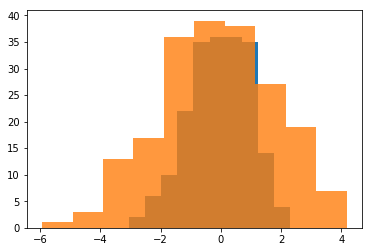

In [5]:
plt.figure
plt.hist(X_train_0)

plt.hist(X_train_1, alpha=0.8)

In [6]:
# Bayes Classifier
test = pd.read_csv('./datasets_assignement1/P1b_test_data.txt',skiprows=0, header=None)
    
print(len(test))

400


In [7]:
X_test = train.values[:,0]
y_test = train.values[:,1]

print(X_test.shape, y_test.shape)

(400,) (400,)


In [8]:
def accuracy(y_predict, y_test):
    return np.average(y_predict == y_test)

In [9]:
def P(x, Class=None):
    if Class == 0:
        return stat.norm(mu0, sig0).pdf(x)
    else:
        return stat.norm(mu1, sig1).pdf(x)

In [10]:
y_predict = [] ## 0 --- 1 = 0 pos
               ## 1 -- -1 = 1 neg
for i in range(len(test)):
    if P(X_test[i], 0) > P(X_test[i], 1):
        y_predict.append(1)
    else:
        y_predict.append(-1)
        
print(accuracy(y_predict, y_test))

0.65
